# How to Train YOLOv8 to Detect Ripe and Unripe Tomatoes

## Before starting

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that.

In [5]:
!nvidia-smi

Mon Oct 20 08:53:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [6]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.8/112.6 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

In [11]:
%cd {HOME}

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("pfe-m9rrc").project("tomato_detection-lrw6c")
dataset = project.version(2).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tomato_detection-2 in yolov8:: 100%|██████████| 2712/2712 [00:00<00:00, 5600.78it/s]


## Custom Training

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 imgsz=256 batch=16 iou=0.4 plots=True   patience=0

/content
100% 83.7M/83.7M [00:02<00:00, 43.3MB/s]
New https://pypi.org/project/ultralytics/8.3.217 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/tomato_detection-2/data.yaml, epochs=50, time=None, patience=0, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.4, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

/content


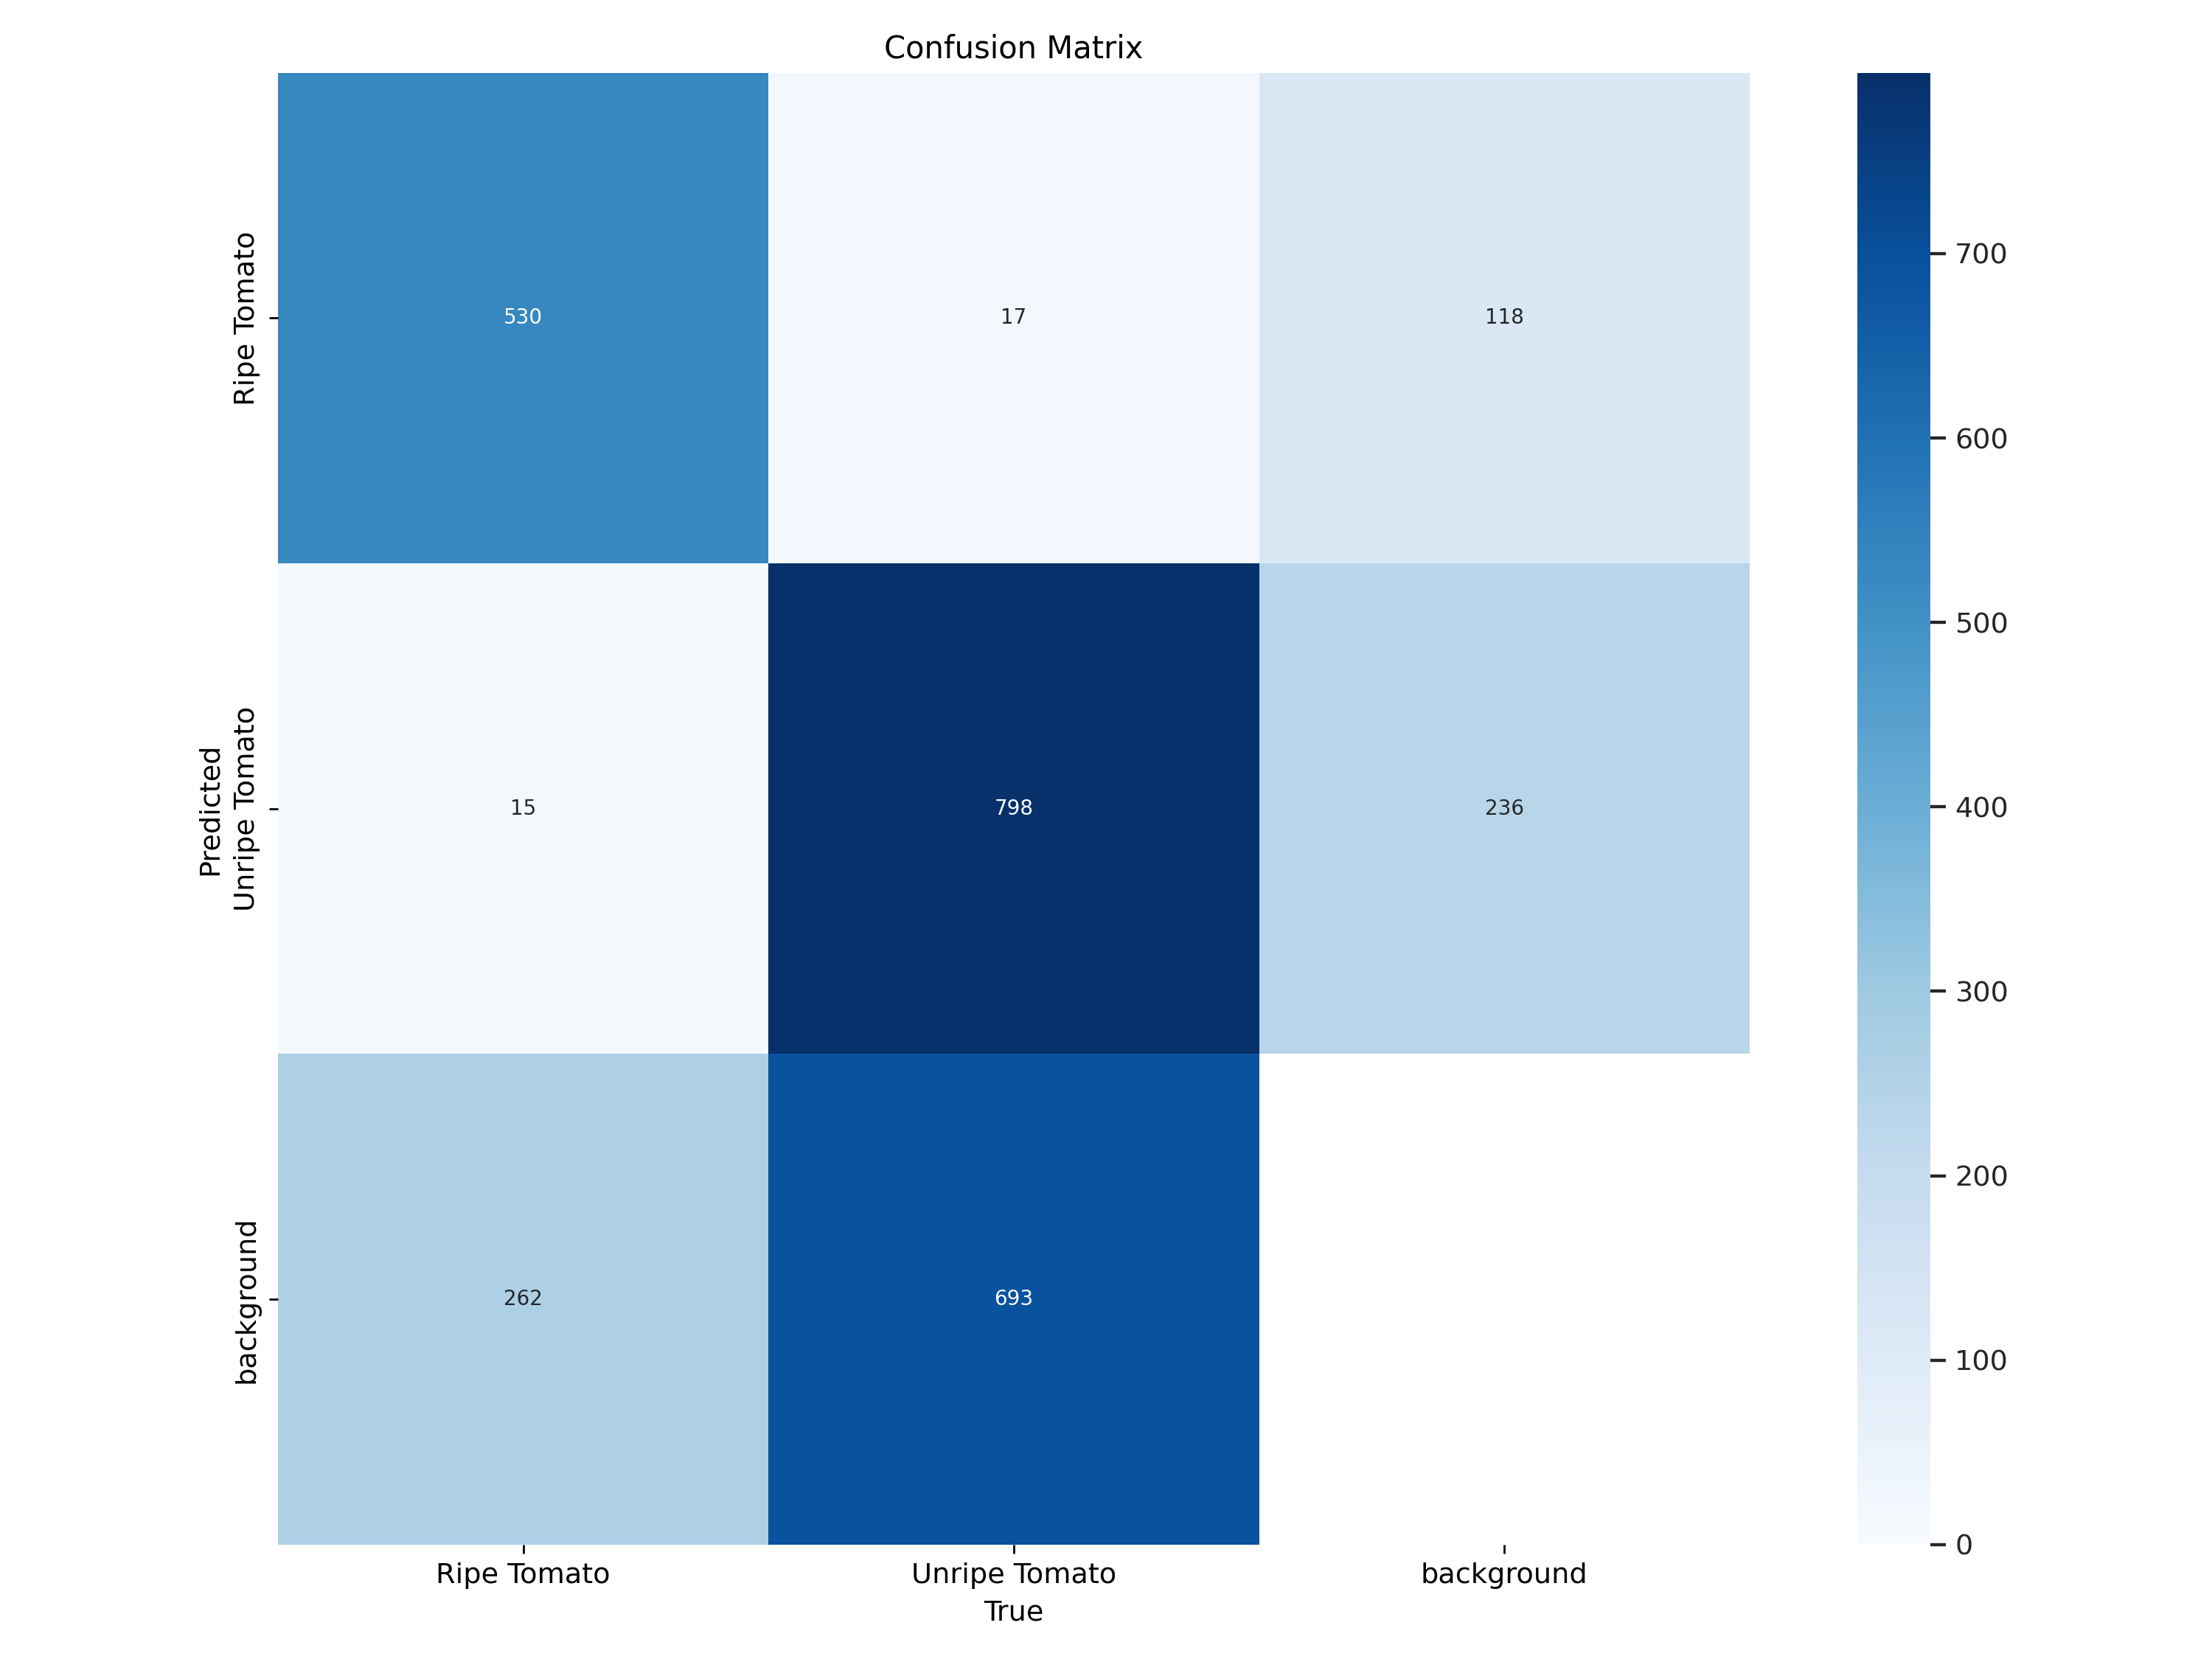

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


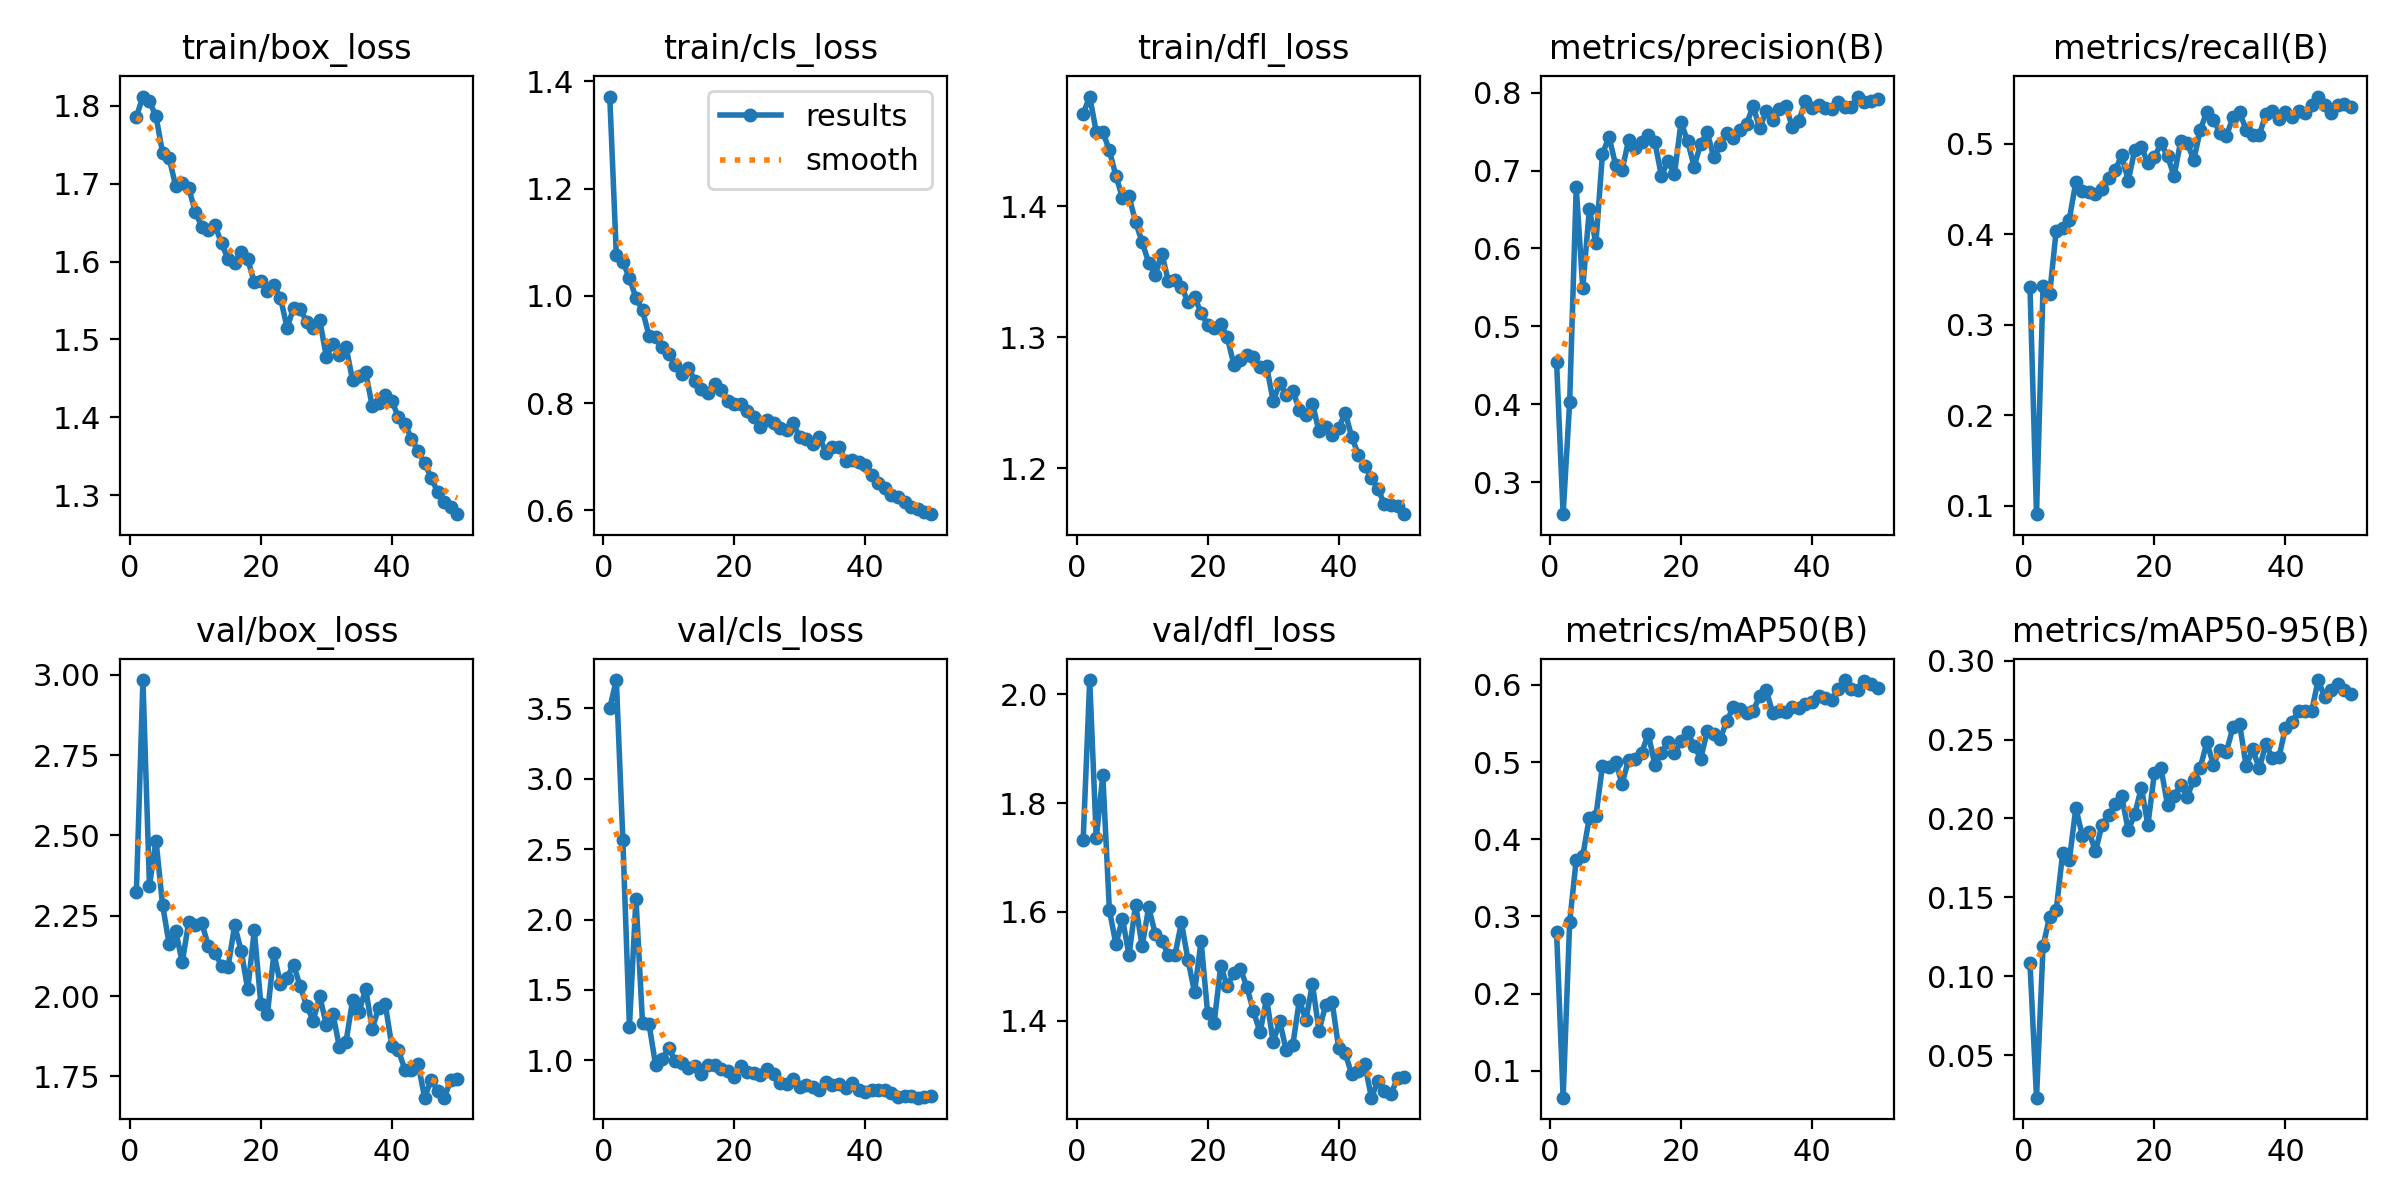

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


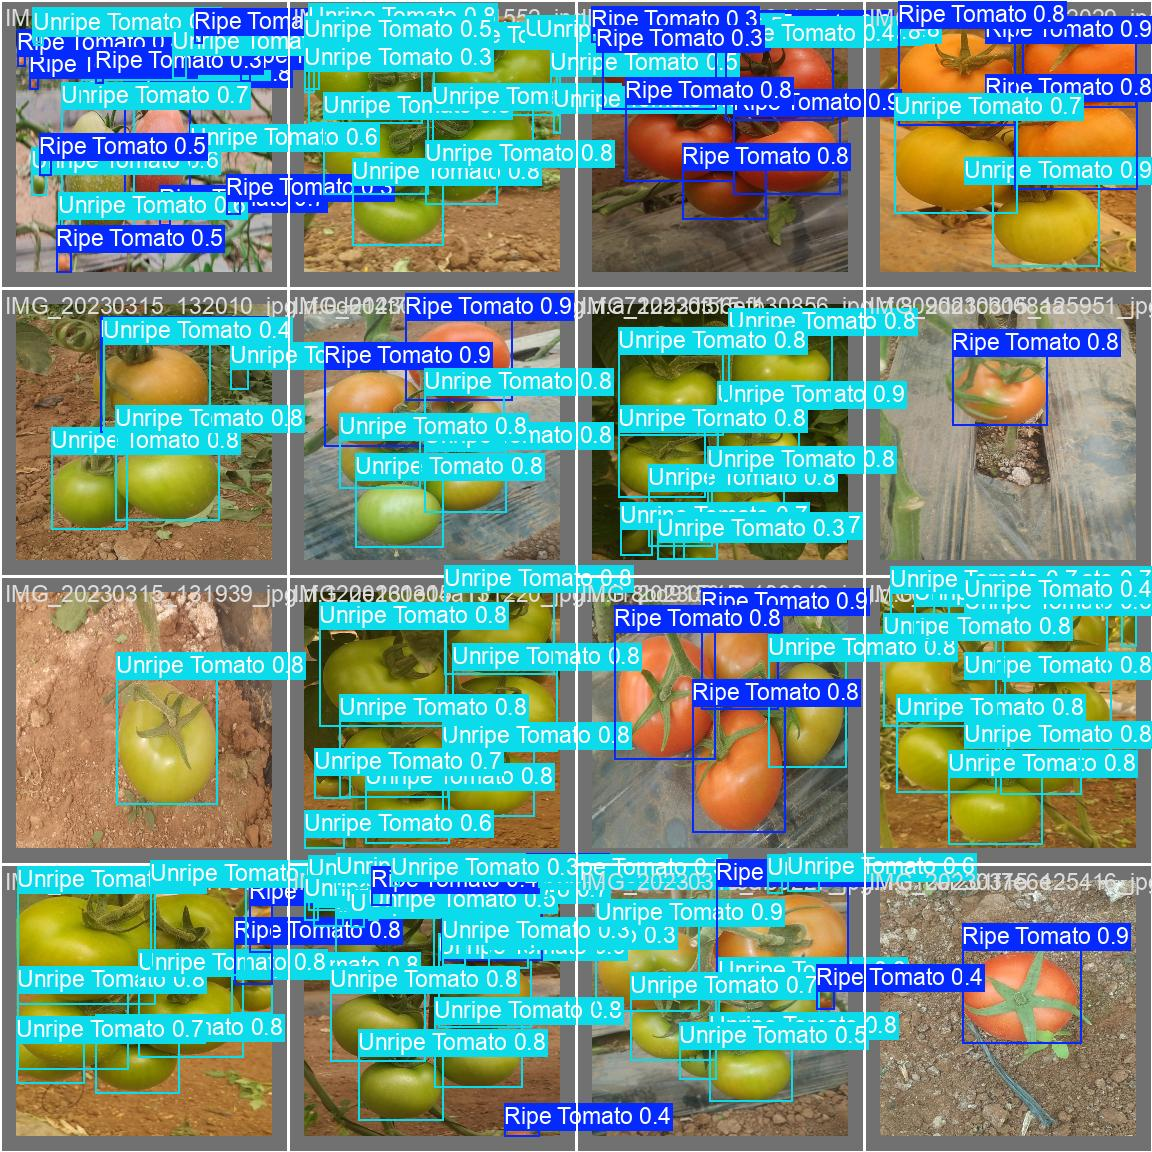

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/tomato_detection-2/valid/labels.cache... 112 images, 0 backgrounds, 0 corrupt: 100% 112/112 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.45it/s]
                   all        112       2315      0.781      0.543      0.608      0.292
           Ripe Tomato        106        807      0.799      0.602      0.672      0.345
         Unripe Tomato        102       1508      0.763      0.485      0.543      0.238
Speed: 0.7ms preprocess, 7.7ms inference, 0.1ms loss, 19.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs

image 1/56 /content/datasets/tomato_detection-2/test/images/IMG_20220127_161710_jpg.rf.74f4aa0dfe71b75a6167ee21072cb17e.jpg: 256x256 1 Ripe Tomato, 18.8ms
image 2/56 /content/datasets/tomato_detection-2/test/images/IMG_20220127_161721_jpg.rf.f5a6fd311bbee3179b29b67a6630a09d.jpg: 256x256 7 Ripe Tomatos, 6 Unripe Tomatos, 18.8ms
image 3/56 /content/datasets/tomato_detection-2/test/images/IMG_20220127_162014_jpg.rf.77cb0d685a7e78edbca38daf7ef4bfb6.jpg: 256x256 6 Ripe Tomatos, 6 Unripe Tomatos, 18.7ms
image 4/56 /content/datasets/tomato_detection-2/test/images/IMG_20220127_162040_jpg.rf.81310d4f46d7d2da2a4e357ffbd67de3.jpg: 256x256 13 Ripe Tomatos, 24 Unripe Tomatos, 18.7ms
image 5/56 /content/datasets/tomato_detection-2/test/images/IMG_20220127_162050_jpg.rf.958a0efb146417313ff182d8012aa9b1.jpg: 256x256 5 Ripe

**NOTE:** Let's take a look at few results.

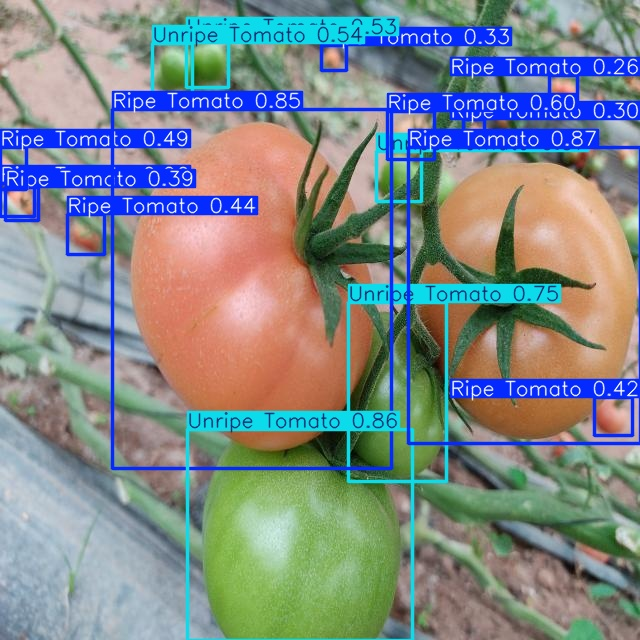

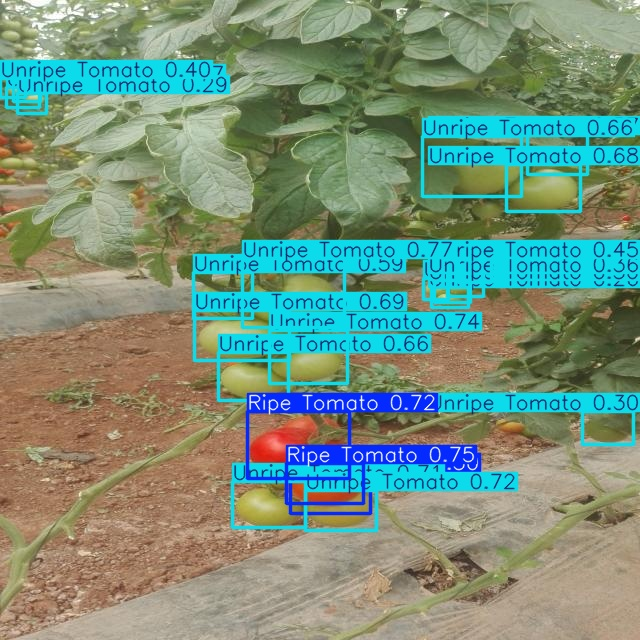

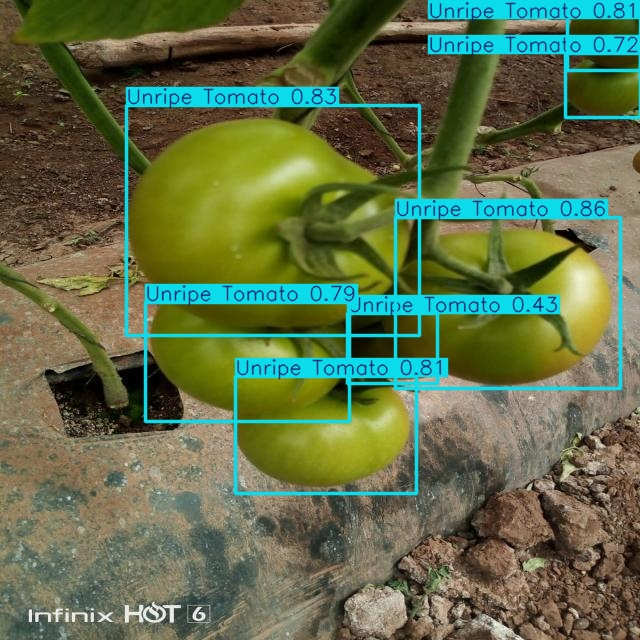

In [19]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")